In [3]:
import pandas as pd

# Load the training and testing datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Assuming test_data does not contain the 'is_claim' column
# Add 'is_claim' column to test_data with all values as NaN
test_data['is_claim'] = None  # or use np.nan if numpy is imported

# Merge the datasets
merged_data = pd.concat([train_data, test_data], ignore_index=True)

# Save the merged dataset to a new CSV file
merged_data_path = 'car_insurance_claim_dataset.csv'
merged_data.to_csv(merged_data_path, index=False)

merged_data_path


'car_insurance_claim_dataset.csv'

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the merged dataset
merged_data_path = 'car_insurance_claim_dataset.csv'
merged_data = pd.read_csv(merged_data_path)

# Display basic information about the dataset
print(merged_data.info())
print("Initial missing values per column:")
print(merged_data.isnull().sum())

# Convert 'is_claim' from object to float to handle NaNs appropriately
merged_data['is_claim'] = merged_data['is_claim'].astype(float)

# Exclude rows where 'is_claim' is NaN for specific analyses
# This removes test data entries for analysis purposes
analysis_data = merged_data.dropna(subset=['is_claim'])

# Assuming 'is_claim' should be a binary categorical variable
analysis_data['is_claim'] = analysis_data['is_claim'].astype(int)

# Data Cleaning: Remove non-numeric columns that cannot be used in correlation analysis
# Drop non-relevant or non-numeric columns explicitly if known
# For example, dropping a 'policy_id' column if it's non-numeric and not useful for correlation
if 'policy_id' in analysis_data.columns:
    analysis_data.drop(columns=['policy_id'], inplace=True)

# Ensuring all columns left are appropriate for numeric analysis
numeric_data = analysis_data.select_dtypes(include=[np.number])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         97655 non-null  object 
 1   policy_tenure                     97655 non-null  float64
 2   age_of_car                        97655 non-null  float64
 3   age_of_policyholder               97655 non-null  float64
 4   area_cluster                      97655 non-null  object 
 5   population_density                97655 non-null  int64  
 6   make                              97655 non-null  int64  
 7   segment                           97655 non-null  object 
 8   model                             97655 non-null  object 
 9   fuel_type                         97655 non-null  object 
 10  max_torque                        97655 non-null  object 
 11  max_power                         97655 non-null  object 
 12  engi

C:\Users\mohit\AppData\Local\Temp\ipykernel_28696\2306394518.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data['is_claim'] = analysis_data['is_claim'].astype(int)
C:\Users\mohit\AppData\Local\Temp\ipykernel_28696\2306394518.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_data.drop(columns=['policy_id'], inplace=True)


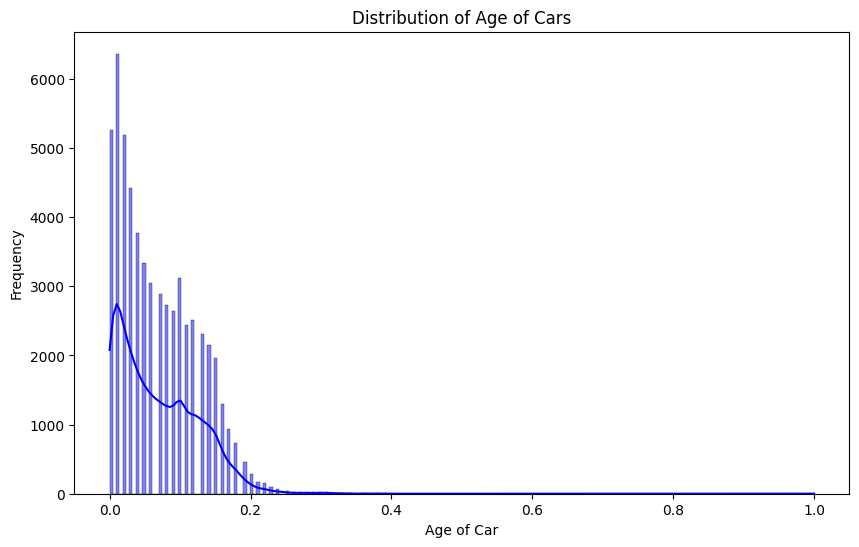

In [9]:

# Histogram of 'age_of_car' to understand distribution
plt.figure(figsize=(10, 6))
sns.histplot(numeric_data['age_of_car'], kde=True, color='blue')
plt.title('Distribution of Age of Cars')
plt.xlabel('Age of Car')
plt.ylabel('Frequency')
plt.show()




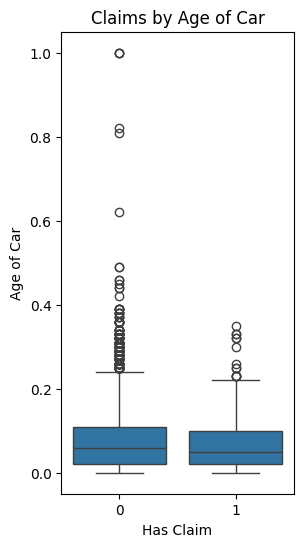

In [14]:

# Boxplot to visualize claims by car age
plt.figure(figsize=(3, 6))
sns.boxplot(x='is_claim', y='age_of_car', data=numeric_data)
plt.title('Claims by Age of Car')
plt.xlabel('Has Claim')
plt.ylabel('Age of Car')
plt.show()

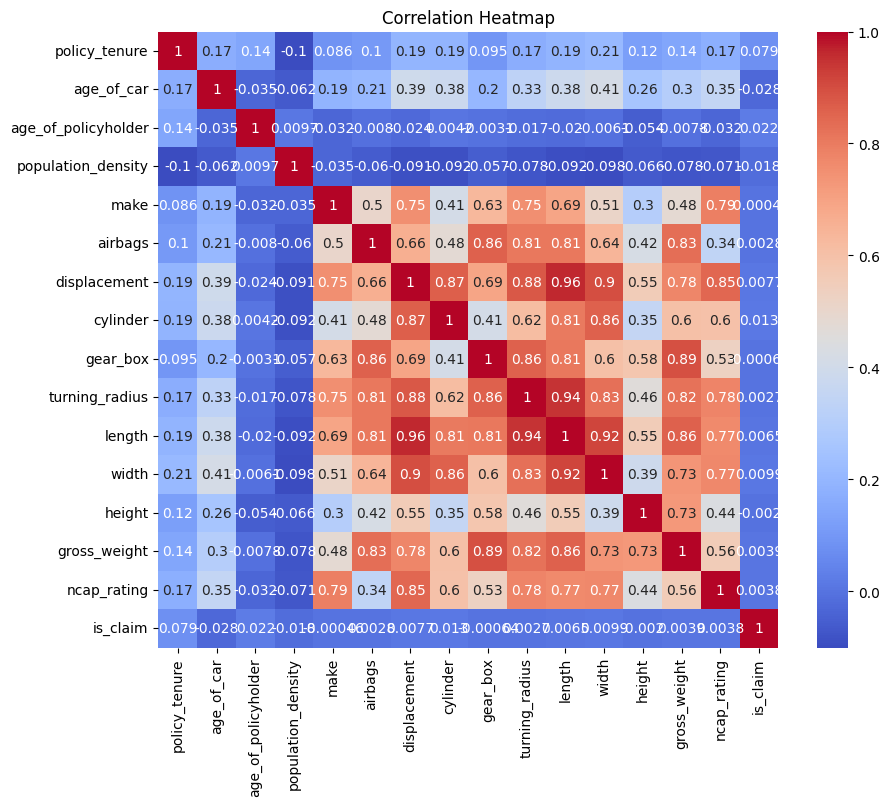

In [11]:
# Correlation heatmap to find relationships between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
